**STOCK PREDICTION WITH PYTHON (USING LSTM NETWORKS TO PREDICT STOCK)**

In [5]:
import pandas as pd

df = pd.read_csv(r'C:\Users\GLORY COMPUTERS\Downloads\MSFT.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060163,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062311,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063386,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061774,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060700,47894400
...,...,...,...,...,...,...,...
9579,2024-03-18,414.250000,420.730011,413.779999,417.320007,417.320007,20106000
9580,2024-03-19,417.829987,421.670013,415.549988,421.410004,421.410004,19837900
9581,2024-03-20,422.000000,425.959991,420.660004,425.230011,425.230011,17860100
9582,2024-03-21,429.829987,430.820007,427.160004,429.369995,429.369995,21296200


In [6]:
df = df[['Date','Close']]
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9579,2024-03-18,417.320007
9580,2024-03-19,421.410004
9581,2024-03-20,425.230011
9582,2024-03-21,429.369995


In [7]:
df['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9579    2024-03-18
9580    2024-03-19
9581    2024-03-20
9582    2024-03-21
9583    2024-03-22
Name: Date, Length: 9584, dtype: object

In [8]:
import datetime

def str_to_datetime(s):
    split = s.split('-')
    year,month,day = int(split[0]),int(split[1]),int(split[2])
    return datetime.datetime(year=year,month=month,day= day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [9]:
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9579,2024-03-18,417.320007
9580,2024-03-19,421.410004
9581,2024-03-20,425.230011
9582,2024-03-21,429.369995


In [10]:
df['Date']=df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\GLORY COMPUTERS\AppData\Local\Temp\ipykernel_14324\1876721881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']=df['Date'].apply(str_to_datetime)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9579   2024-03-18
9580   2024-03-19
9581   2024-03-20
9582   2024-03-21
9583   2024-03-22
Name: Date, Length: 9584, dtype: datetime64[ns]

In [11]:
df.index = df.pop('Date')
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2024-03-18,417.320007
2024-03-19,421.410004
2024-03-20,425.230011


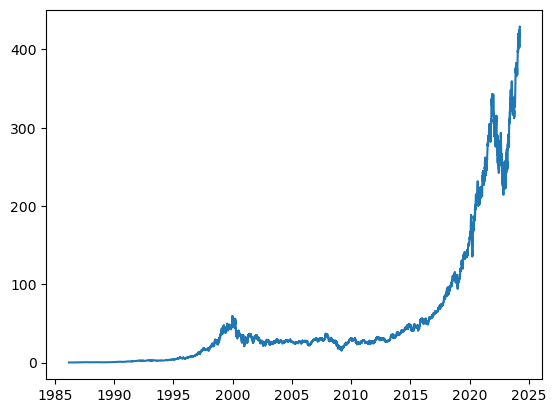

In [43]:
import matplotlib.pyplot as plt
plt.plot(df.index,df['Close'])

In [13]:
import numpy as np

def df_to_windowed_df(dataframe,first_date_str,last_date_str,n=3):
    first_date = str_to_datetime(first_date_str)
    last_date = str_to_datetime(last_date_str)

    target_date = first_date

    dates =[]
    X,Y =[],[]

    last_time=False
    while True:
        df_subset = dataframe.loc[:target_date].tail(n+1)

        if len(df_subset) !=n+1:
            print(f'Error:Window of size {n} is too large for date {target_date}')
            return

        values=df_subset['Close'].to_numpy()
        x,y = values[:n],values[-1]

        dates.append(target_date)
        X.append(x)
        Y.append(y)

        next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year_month_day = next_date_str.split('-')
        year, month, day = year_month_day
        next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
        if last_time:
          break
    
        target_date = next_date

        if target_date == last_date:
          last_time = True
    
    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates
  
    X = np.array(X)
    for i in range(0, n):
        X[:, i]
        ret_df[f'Target-{n-i}'] = X[:, i]
  
    ret_df['Target'] = Y

    return ret_df

# # Assign values to the DataFrame columns
#     for i in range(0, n):
#         if X.shape[1] > i:  # Check if the column exists in X
#             ret_df[f'Target-{n-i}'] = X[:, i]

#     ret_df['Target'] = Y

#     return ret_df


# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, '2021-03-25', '2024-03-22', n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
749,2024-03-18,415.100006,425.220001,416.420013,417.320007
750,2024-03-19,425.220001,416.420013,417.320007,421.410004
751,2024-03-20,416.420013,417.320007,421.410004,425.230011
752,2024-03-21,417.320007,421.410004,425.230011,429.369995


In [14]:
def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()

    dates = df_as_np[:,0]

    middle_matrix = df_as_np[:,1:-1]
    X = middle_matrix.reshape((len(dates),middle_matrix.shape[1],1))

    Y =df_as_np[:,-1]

    return dates,X.astype(np.float32),Y.astype(np.float32)

dates,X, y = windowed_df_to_date_X_y(windowed_df)
dates.shape,X.shape,y.shape

((754,), (754, 3, 1), (754,))

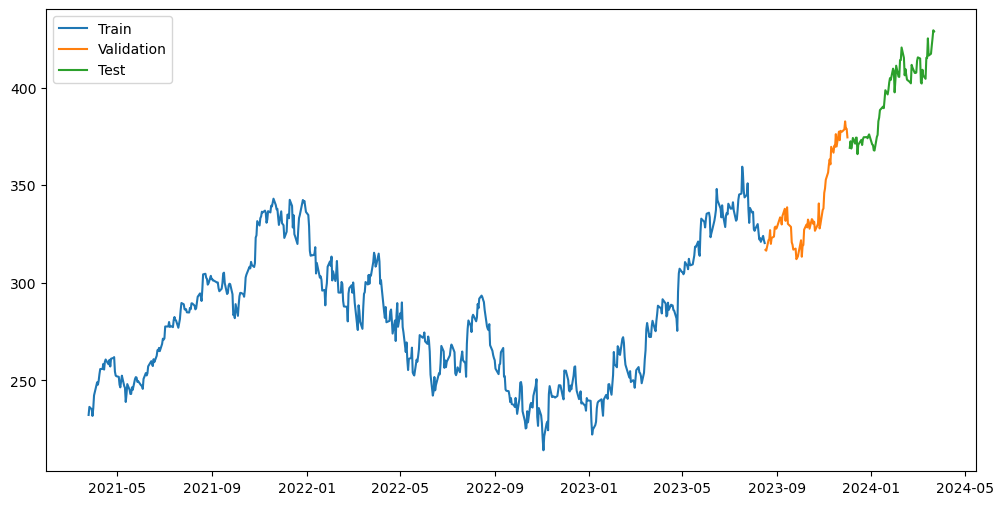

In [38]:
import matplotlib.pyplot as plt

# Define the size of the plot
plt.figure(figsize=(12, 6))  # Adjust width and height as needed

q_80 = int(len(dates) * 0.8)
q_90 = int(len(dates) * 0.9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

plt.show()

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3,1)),layers.LSTM(64),layers.Dense(32,activation='relu'),layers.Dense(32,activation='relu'),layers.Dense(1)])
model.compile(loss='mse',optimizer = Adam(learning_rate=0.01),metrics=['mean_absolute_error'])
model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 77499.1641 - mean_absolute_error: 276.2534 - val_loss: 75441.4609 - val_mean_absolute_error: 273.8761
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29579.3281 - mean_absolute_error: 156.5953 - val_loss: 896.8156 - val_mean_absolute_error: 27.3131
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4381.2217 - mean_absolute_error: 56.0464 - val_loss: 7402.6123 - val_mean_absolute_error: 83.4825
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1298.5526 - mean_absolute_error: 29.1327 - val_loss: 3346.3359 - val_mean_absolute_error: 53.9727
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1082.0116 - mean_absolute_error: 27.8667 - val_loss: 3488.9639 - val_mean_absolute_error: 55.2782
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1057.3883 - mean_absolute_error: 27.6566 - val_loss: 3898.9775 - val_mean_absolute_error: 58.8744
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step -

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


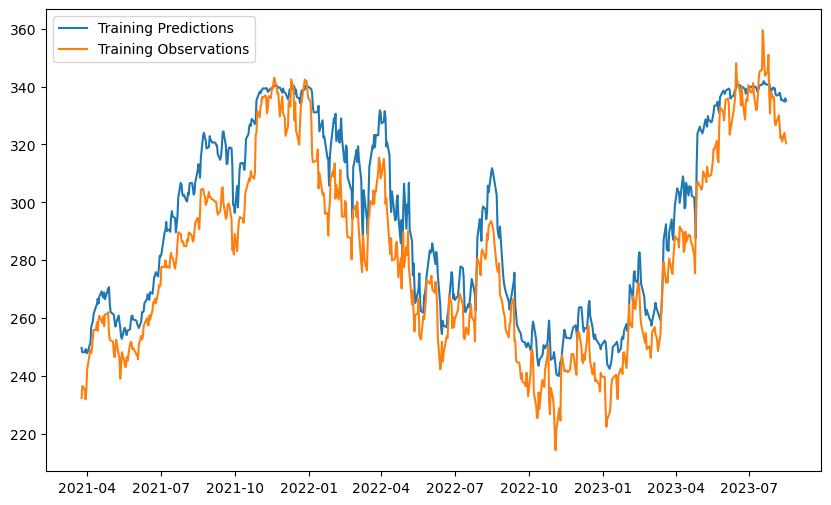

In [37]:
train_predictions = model.predict(X_train).flatten()

# Set the figure size
plt.figure(figsize=(10, 6))  # Adjust width and height as needed

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


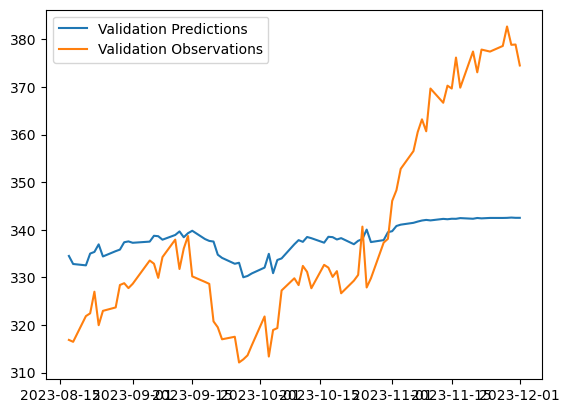

In [33]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val,val_predictions)
plt.plot(dates_val,y_val)
plt.legend(['Validation Predictions','Validation Observations'])

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


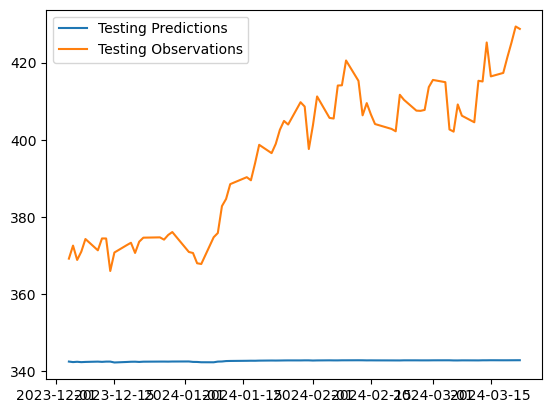

In [34]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

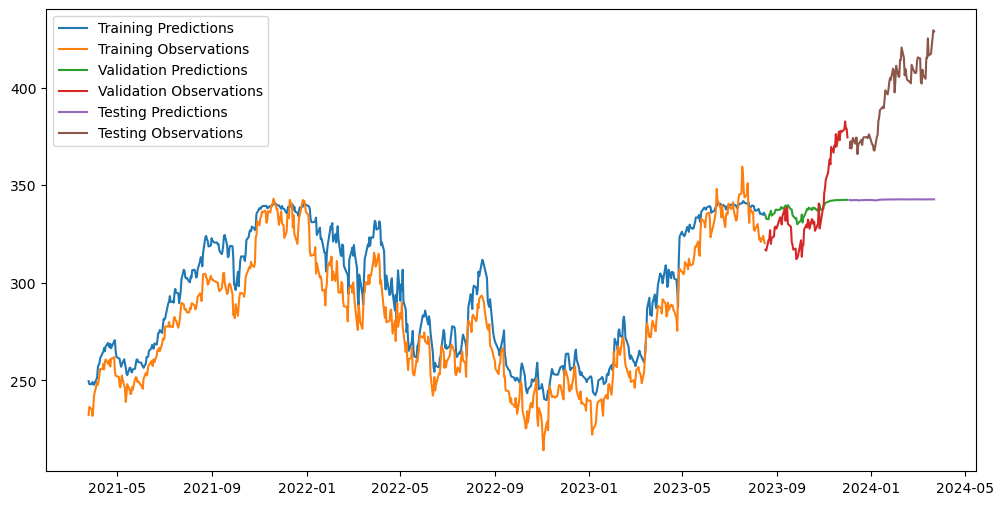

In [36]:
plt.figure(figsize=(12, 6))  # Set the width and height of the figure

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

plt.show()

In [44]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━

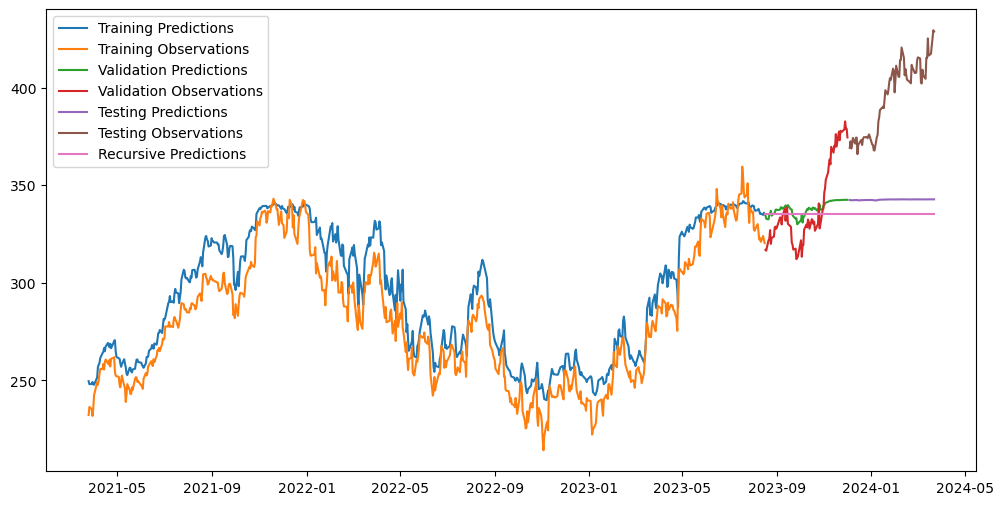

In [45]:
# Set the figure size
plt.figure(figsize=(12, 6))  # Set the width to 12 inches and height to 6 inches

# Plot the data
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)

# Add legend
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])

plt.show()
